<a href="https://colab.research.google.com/github/min02choi/Style-Color-Detect/blob/main/gradation_degree_calculate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 그라데이션 색상 및 방향 추출

폰트 내부의 그라데이션 정도 계산

구해야 할 것
1. 그라데이션 방향
2. 방향의 양 끝의 RGB값


전제 사항
1. 내부 텍스트에만 그라데이션이 적용 이 아님(str의 테두리에도 가능)
2. 사진은 RGBA 형태

## 코드 흐름
### none
1. 그라데이션 체크
  - 방향 구하기
  - 양 끝의 픽셀 구하기

### str
-

### Api 명세 및 코드 흐름
처음 시작을... - 해당 영역에서 그라데이션 존재 여부가 검출됨

<원본 이미지에서 데이터를 뽑아오는 과정>
1. 해당 영역만 도려냄
2. 해당 영역에서 그라데이션의 방향을 검출함
  1. 이미지 고대비 변환: histo stratch
  2. 엣지 추출
  3. 선의 각도 계산: 허프 변환
3. 그라데이션 영역에서 처음 색과 끝 색을 검출
  1. 내부에 있는 색상 중 거리가 가장 먼 색(유클리드)

<재현하는 과정>
4. 해당 그라데이션 영역을 포함하는 가장 작은 직사각형 그리기
5. 해당 직사각형에 앞서 구한 그라데이션 방향과 처음 색, 끝 색을 적용하여 그라데이션 그리기 엥?
6.


### 그라데이션 이미지에서 색상 코드 값 확인하기
- 픽셀 값의 변화 파악

In [28]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

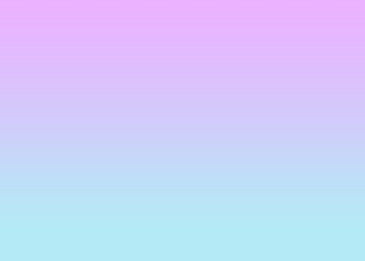

In [29]:
image = cv2.imread('bg_gradation.jpeg')
cv2_imshow(image)

In [30]:
image.shape

(261, 365, 3)

In [31]:
# 수직으로픽셀 값 확인
h = image.shape[0]
w = image.shape[1]

print(h, w)

color_arr = []

for i in range(h - 1):
    color_arr.append(image[i][w // 2])
    print(image[i][w // 2])

261 365
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[254 177 234]
[254 179 233]
[254 179 233]
[254 179 233]
[254 179 233]
[254 179 233]
[254 179 233]
[254 180 232]
[254 180 232]
[254 180 232]
[254 180 232]
[254 180 232]
[254 180 232]
[255 181 233]
[255 181 233]
[254 181 231]
[254 181 231]
[254 181 231]
[254 181 231]
[255 182 232]
[255 182 232]
[255 183 230]
[255 183 230]
[255 183 230]
[255 183 230]
[255 183 230]
[255 183 229]
[255 183 229]
[255 183 229]
[255 183 229]
[253 184 229]
[255 184 227]
[255 184 227]
[255 184 227]
[255 184 227]
[254 185 228]
[253 185 226]
[253 185 226]
[253 185 226]
[254 186 227]
[254 186 227]
[254 186 227]
[254 186 227]
[254 186 227]
[252 187 226]
[252 187 226]
[254 187 226]
[254 187 226]
[254 187 226]
[252 188 224]
[252 188 224]
[252 188 224]
[252 188 224]
[253 189 224]
[253 189 224]
[253 189 224]
[252 188 223]
[252 188 223]
[253 190 222]
[253 190 222]
[253 190 222]
[253 190 222]
[253 191 221]
[253 191 221

In [32]:
# 수평으로픽셀 값 확인
h = image.shape[0]
w = image.shape[1]

print(h, w)

for i in range(w - 1):
    print(image[h // 2][i])

261 365
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207

In [33]:
import math
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageEnhance

In [34]:
def bgr_difference(start, end):
    diff = [-(start[0] - end[0]), -(start[1] - end[1]), -(start[2] - end[2])]
    return diff

(365, 261)
261 365
[217, 155, 81]
[0.83141762 0.59386973 0.31034483]
(261, 365, 4)
[4.83141762 3.59386973 1.31034483]
>>  [5, 4, 1]
[5.66283525 4.18773946 1.62068966]
>>  [6, 4, 2]
[6.49425287 4.7816092  1.93103448]
>>  [6, 5, 2]
[7.3256705  5.37547893 2.24137931]
>>  [7, 5, 2]
[8.15708812 5.96934866 2.55172414]
>>  [8, 6, 3]
[8.98850575 6.56321839 2.86206897]
>>  [9, 7, 3]
[9.81992337 7.15708812 3.17241379]
>>  [10, 7, 3]
[10.651341    7.75095785  3.48275862]
>>  [11, 8, 3]
[11.48275862  8.34482759  3.79310345]
>>  [11, 8, 4]
[12.31417625  8.93869732  4.10344828]
>>  [12, 9, 4]
[13.14559387  9.53256705  4.4137931 ]
>>  [13, 10, 4]
[13.97701149 10.12643678  4.72413793]
>>  [14, 10, 5]
[14.80842912 10.72030651  5.03448276]
>>  [15, 11, 5]
[15.63984674 11.31417625  5.34482759]
>>  [16, 11, 5]
[16.47126437 11.90804598  5.65517241]
>>  [16, 12, 6]
[17.30268199 12.50191571  5.96551724]
>>  [17, 13, 6]
[18.13409962 13.09578544  6.27586207]
>>  [18, 13, 6]
[18.96551724 13.68965517  6.5862069 

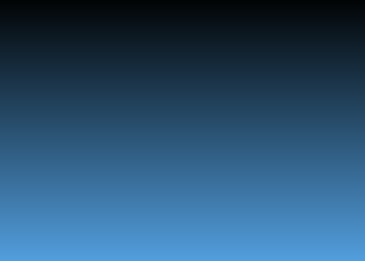

In [72]:
# 양 끝의 픽셀 값을 기준으로 다시 재현해보기
#
img = Image.new(mode='RGB', size=(365, 261), color=(0, 0, 0))
draw = ImageDraw.Draw(img)

# start = [255, 178, 235]
# end = [246, 234, 180]

# BRG순으로 기입
start = [4, 3, 1]
end = [221, 158, 82]

print(img.size)

w = img.size[0]    # 365
h = img.size[1]    # 261

print(h, w)

# 방향 길이에 따라 offset계산
# 방향 길이 구하는 법: 처음 픽셀과 끝 픽셀을 구하면 ... 추후
# 결과가 이상하면 구간으로 잘라서 재현하는 방법도 있음
LENGTH = 261
bgr_diff = bgr_difference(start, end)
print(bgr_diff)
bgr_offset = np.array([m / LENGTH for m in bgr_diff])
print(bgr_offset)

blue = start[0]
green = start[1]
red = start[2]

float_bgr = np.array([float(blue), float(green), float(red)])
# float_bgr = np.array([float(blue), float(green), float(red)])


# Pillow 이미지를 OpenCV 이미지로 변환
open_cv_image = np.array(img)
# OpenCV 이미지를 BGRA 형식으로 변환
open_cv_image = cv2.cvtColor(open_cv_image, cv2.COLOR_RGBA2BGRA)
print(open_cv_image.shape)

# 정수형으로 된다고 가정하면 반올림(round)
for i in range(open_cv_image.shape[0]):
    float_bgr += bgr_offset
    print(float_bgr)
    int_bgr = [round(float_bgr[0]), round(float_bgr[1]), round(float_bgr[2])]
    print(">> ", int_bgr)

    for j in range(open_cv_image.shape[1]):
        # print(int_bgr)
        # print(open_cv_image[i][j])
        open_cv_image[i][j][0] = int_bgr[0]
        open_cv_image[i][j][1] = int_bgr[1]
        open_cv_image[i][j][2] = int_bgr[2]

cv2_imshow(open_cv_image)


시작 색, 끝 색이 주어지면 이들의 평균으로 그림을 그렸을 때 원본이 나온다는 가정이 맞다고 판단됨


이제 완벽하게 재현하기 위해 필요한 매개변수
1. 시작 색
2. 끝 색
3. 방향

### 시작색, 끝색, 방향이 지정되었을 때 그라데이션 그리기
- 방향정보는 단위 벡터로 표시

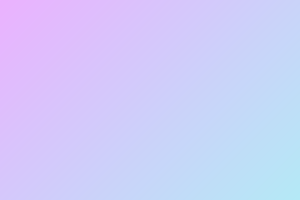

In [36]:
import numpy as np
from PIL import Image, ImageDraw

# 시작 색과 끝 색
start_color = (255, 0, 0)  # 빨간색
end_color = (0, 0, 255)    # 파란색

start_color = (255, 178, 235)
end_color = (246, 234, 180)

start_color = (235, 178, 255)
end_color = (180, 234, 246)

# 이미지 크기
width = 300
height = 200

# 방향 (단위 벡터로 표현)
direction = np.array([1, 1])  # x축 방향으로 1, y축 방향으로 1

# 이미지 생성
img = Image.new('RGB', (width, height), color=(0, 0, 0))
draw = ImageDraw.Draw(img)

# 시작 색과 끝 색 사이의 보간값 계산하여 이미지에 그라데이션 적용
for x in range(width):
    for y in range(height):
        # 현재 위치에서 시작 색과 끝 색 사이의 보간값 계산
        ratio = (x * direction[0] + y * direction[1]) / (width + height)
        blended_color = tuple(int(start_channel + (end_channel - start_channel) * ratio)
                              for start_channel, end_channel in zip(start_color, end_color))
        # 보간된 색을 이미지에 적용
        draw.point((x, y), fill=blended_color)

# Pillow 이미지를 OpenCV 이미지로 변환
cv_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# 이미지 화면에 표시
cv2_imshow(cv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


* 그라데이션의 방향을 알 수 있는 방법... 벡터형으로
이거만 하면 다 해결됨

### 선형보간법을 이용한 그라데이션 그리기
1. 그라데이션이 적용된 텍스트 부분을 포함하는 최소 크기의 직사각형을 구함
2. 해당 직사각형의 각 꼭짓점의 좌표와 RGB 값을 구함
3. 유클리드를 이용해서 가장 차이가 많은 두 색을 구함. 이 두 색이 그라데이션의 양 끝 두개의 색
4. 해당 직사각형에 대해서 그림을 그림(선형 보간을 이용)
5. 그라데이션이 적용된 텍스트의 부분만 방금 생성한 이미지에서 픽셀 값을 불러옴(그라데이션 이미지에 해당 텍스트 모양의 마스크를 씌우는 느낌)

### 그라데이션 방향 계산하기
**방법 1**
* 특정 한 픽셀을 잡아서 상하좌우 값을 확인함.

함수 API 설계
getEndColor(): 그라데이션의 양 끝 색의 코드값을 반환하는 함수
* input:
* Output: RGBA코드 값 두개

In [37]:
def getColorDiff(c1, c2):
    color = (c1[0] - c2[0], c1[1] - c2[1], c1[2] - c2[2])
    return color

In [38]:
# 방법 1
# 픽셀을 기준으로 상하좌우 픽셀값 왁인, 그 차이로 어쩌고 저쩌고
image = cv2.imread('bg_gradation.jpeg')

a = [100, 100]
b = [200, 200]

location = ["우", "상", "좌", "하"]
dx = [1, 0, -1, 0]
dy = [0, 1, 0. -1]

for i in range(4):
    print(image[a[0]], [a[1]])
    print(location, getColorDiff(image[a[0], a[1]], image[a[0]+dx[i], a[1]+dy[i]]))


[[252 198 215]
 [252 198 215]
 [252 198 215]
 ...
 [252 198 215]
 [252 198 215]
 [252 198 215]] [100]
['우', '상', '좌', '하'] (0, 0, 0)
[[252 198 215]
 [252 198 215]
 [252 198 215]
 ...
 [252 198 215]
 [252 198 215]
 [252 198 215]] [100]
['우', '상', '좌', '하'] (0, 0, 0)
[[252 198 215]
 [252 198 215]
 [252 198 215]
 ...
 [252 198 215]
 [252 198 215]
 [252 198 215]] [100]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [39]:
image = cv2.imread('bg_gradation.jpeg')

print(image.shape)

a = [100, 100]
b = [200, 200]

print(image[100][100])
print(image[100][95])
print(image[100][105])
print(image[95][100])
print(image[105][100])

(261, 365, 3)
[252 198 215]
[252 198 215]
[252 198 215]
[252 197 216]
[250 199 213]


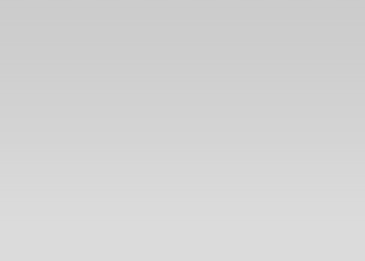

Gradient Direction: 5156


In [40]:
import cv2
import numpy as np

def detect_gradient_direction(image_path):
    # 이미지 읽기
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    cv2_imshow(img)

    # 이미지의 그라데이션 계산
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # 각 픽셀의 그라데이션의 크기와 방향 계산
    gradient_magnitude, gradient_angle = cv2.cartToPolar(grad_x, grad_y, angleInDegrees=True)

    # 그라데이션 방향에 대한 히스토그램 계산
    bins = np.int32((gradient_angle * 180) / np.pi)
    hist = np.bincount(bins.ravel(), gradient_magnitude.ravel(), minlength=180)

    # 히스토그램에서 최대 값을 찾아서 그라데이션 방향 결정
    dominant_angle = np.argmax(hist)

    return dominant_angle

# 이미지 경로 설정
image_path = 'bg_gradation.jpeg'

# 그라데이션 방향 검출
direction = detect_gradient_direction(image_path)
print("Gradient Direction:", direction)

차이가 명확하지 않아서 히스토그램 스트레칭 진행

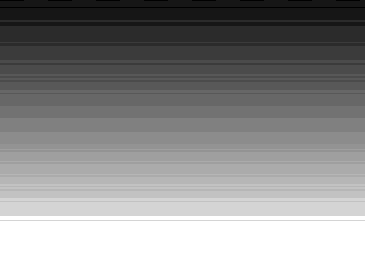

In [41]:
import cv2

# 이미지 경로 설정
image_path = 'bg_gradation.jpeg'
# image_path = '45angle.png'

# 이미지 읽기
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 히스토그램 평활화 적용
equalized_img = cv2.equalizeHist(img)
cv2_imshow(equalized_img)

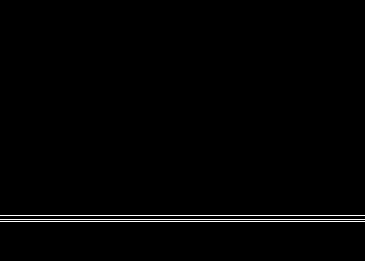

Detected line angles: [90.00000250447816, 90.00000250447816, 90.00000250447816, 89.00000133828577, 90.99999684048139]


In [42]:
import cv2
import numpy as np

def detect_lines(gray_image):
    # 이미지 읽기
    # img = cv2.imread(image_path)
    gray = gray_image

    # 가장자리 검출
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    cv2_imshow(edges)

    # 허프 변환을 사용하여 선 감지
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

    # 각도 계산
    angles = []
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            angle = theta * 180 / np.pi
            angles.append(angle)

    return angles

# 이미지 경로 설정
image_path = equalized_img

# 선의 각도 검출
angles = detect_lines(image_path)
print("Detected line angles:", angles)


## Final

### Api 명세 및 코드 흐름
처음 시작을... - 해당 영역에서 그라데이션 존재 여부가 검출됨

<원본 이미지에서 데이터를 뽑아오는 과정>
1. 해당 영역만 도려냄
2. 해당 영역에서 그라데이션의 방향을 검출함
  1. 이미지 고대비 변환: histo stratch
  2. 엣지 추출
  3. 선의 각도 계산: 허프 변환
3. 그라데이션 영역에서 처음 색과 끝 색을 검출
  1. 내부에 있는 색상 중 거리가 가장 먼 색(유클리드)

<재현하는 과정>
4. 해당 그라데이션 영역을 포함하는 가장 작은 직사각형 그리기
5. 해당 직사각형에 앞서 구한 그라데이션 방향과 처음 색, 끝 색을 적용하여 그라데이션 그리기 엥?
6.


In [43]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [44]:
# 그라데이션이 적용된 영역을 반환
def getGradationPart(image, num):
    hist = []
    # 각 픽셀의 화소값
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist.append(tuple(image[i, j]))

    # 픽셀 색상별 등장 횟수 계산
    color_counts = {}
    for color in hist:
        if color in color_counts:
            color_counts[color] += 1
        else:
            color_counts[color] = 1

    sorted_colors = sorted(color_counts.items(), key=lambda x: x[1], reverse=True)
    print(sorted_colors)

    # 명확한 색 판별
    # 자르는 임계 선이 필요할 듯
    color_list = []
    for i in range(len(sorted_colors) - 1):
        if (sorted_colors[i][0][3] == 0):
            pass
        elif (sorted_colors[i][1] > sorted_colors[i+1][1] * 3):
            color_list.append(sorted_colors[i])
            break

    print(color_list)


    # 빈 이미지 생성 (모든 픽셀이 0으로 초기화된 배열)

    label_image = image.copy()
    only_grad_image = image.copy()

    # "그라데이션이 아님"이 명확한 부분은 (0, 0, 0, 0)으로 변환
    # 알파 값이 0인 부분, 앞서 구한 빈도 수 높은 색인 경우
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # print(image[i][j][0:3], color_list[0][0:3])
            # print(image[i][j])
            if image[i][j][3] == 0:
                label_image[i][j] = (0, 0, 0, 0)
                only_grad_image[i][j] = (0, 0, 0, 0)
            elif any(np.array_equal(image[i][j][0:3], color[0][0:3]) for color in color_list):
                only_grad_image[i][j] = (0, 0, 0, 0)
                label_image[i][j] = (130, 130, 130, 255)

            else:
                label_image[i][j] = (0, 0, 0, 255)

    return label_image, only_grad_image


(250, 250, 4)


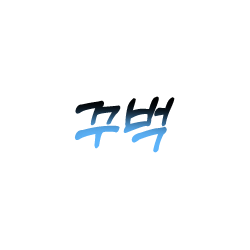

[((255, 255, 255, 0), 55415), ((0, 0, 0, 0), 2491), ((255, 255, 255, 255), 1406), ((255, 255, 255, 228), 77), ((251, 180, 93, 255), 44), ((255, 255, 255, 127), 39), ((255, 255, 255, 213), 37), ((255, 255, 255, 142), 34), ((255, 255, 255, 23), 31), ((255, 255, 255, 170), 30), ((255, 255, 255, 1), 28), ((255, 255, 255, 11), 28), ((255, 255, 255, 47), 25), ((32, 23, 12, 255), 25), ((255, 255, 255, 95), 24), ((255, 255, 255, 29), 22), ((255, 255, 255, 158), 22), ((255, 255, 255, 233), 22), ((255, 255, 255, 2), 21), ((255, 255, 255, 5), 21), ((255, 255, 255, 185), 20), ((255, 255, 255, 71), 20), ((233, 167, 86, 255), 19), ((243, 174, 90, 255), 19), ((244, 175, 90, 255), 19), ((255, 255, 255, 244), 18), ((255, 255, 255, 65), 17), ((255, 255, 255, 59), 17), ((255, 255, 255, 199), 17), ((240, 172, 89, 255), 17), ((255, 255, 255, 17), 16), ((26, 19, 10, 255), 16), ((255, 255, 255, 212), 15), ((255, 255, 255, 31), 14), ((255, 255, 255, 35), 14), ((7, 5, 3, 255), 14), ((237, 170, 88, 255), 14), (

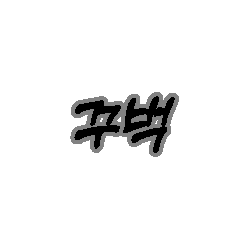

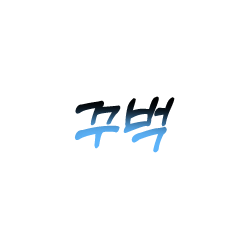

In [62]:
# 해당 영역을 도려내는 법
# 픽셀을 카운트 하여 가장 많은 (동일한) 픽셀이 등장하는 픽셀은 제거함
CUR_STYLE = 2

# IMAGE_PATH = '꾸벅.png'
# IMAGE_PATH = './haha20.png'
IMAGE_PATH = './goubuk.png'

original_image = cv2.imread(IMAGE_PATH, cv2.IMREAD_UNCHANGED)
print(original_image.shape)
cv2_imshow(original_image)

# 그라데이션이 적용된 영역의 이미지(레이블 이미지)
label_image, only_grad_image = getGradationPart(original_image, CUR_STYLE)
cv2_imshow(label_image)
cv2_imshow(only_grad_image)

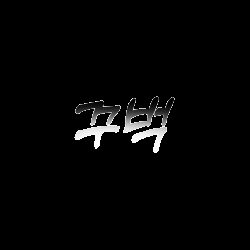

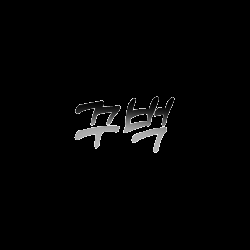

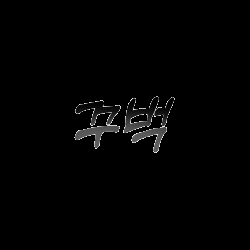

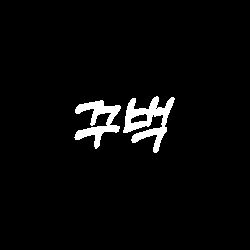

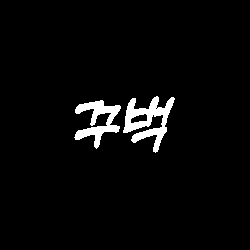

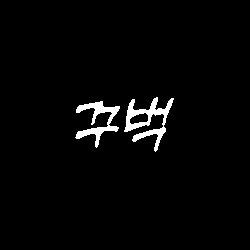

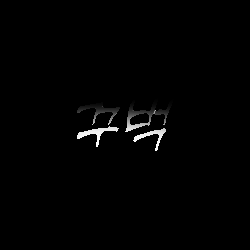

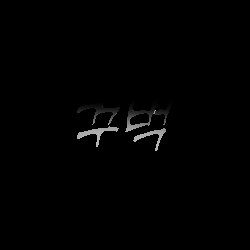

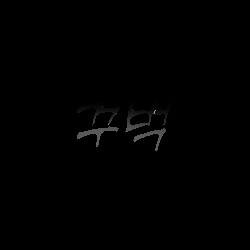

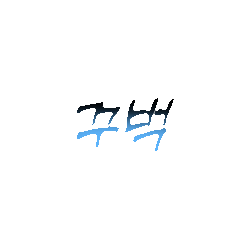

B:  -88.02137281079494 -0.03162714830556177 0.9154739799717594 860
G:  -88.09882147186859 -0.030321359564722594 0.9134588132107354 846
R:  -87.46003704576805 -0.039850592681320775 0.8983496660500732 791
밝기 기울기(x, y화소당) =  272.1540028492344 0.05922610144900414 1.5746528931577195


In [63]:
# 이미지 가장자리의 노이즈를 없애기 위해 침식 작용 - 사용 여부 추후 고민
kernel = np.ones((2,2),np.uint8)

# 이미지 침식 수행
eroded_image = cv2.erode(label_image, kernel, iterations = 2)
# cv2_imshow(eroded_image)


# 1단계: 텍스트와 배경(효과) 영역을 제외한 바탕영역 삭제
# 내가 봤을 때는 이게 그라데이션 부분의 이미지여야 함

# b, g, r, a = cv2.split(original_image)
b, g, r, a = cv2.split(only_grad_image)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
cv2_imshow(a)

a = cv2.threshold(a, 200, 255, cv2.THRESH_BINARY)[1]
#cv2_imshow(a)

''' 원본
# R, G, B 값 중 하나라도 255이면 텍스트의 배경 영역이라 생각함
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if a[i][j] == 255 :
            if b[i][j] == 255 or g[i][j] == 255 or r[i][j] == 255 :
                a[i][j] = 0
cv2_imshow(a)
'''

# 위에서 구한 color_list에 포함되는 색이 있으면 해당 영역을 제거
# 근데 위에서 only_gradation 이미지를 넘겨주면 불필요(위에서 처리를 했기 때문에)
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if a[i][j] == 255 :
            if b[i][j] == 255 or g[i][j] == 255 or r[i][j] == 255 :
                a[i][j] = 0
cv2_imshow(a)

# erosion: a의 외곽 화소를 하나씩 깍아냄
aa = a.copy()
for i in range(1, a.shape[0]-1):
   for j in range(1, a.shape[1]-1):
       if aa[i][j] == 255 :
           if aa[i][j-1] != 255 or aa[i][j+1] != 255 or aa[i-1][j] != 255 or aa[i+1][j] != 255 :
               a[i][j] = 0
cv2_imshow(a)
a = cv2.erode(a, kernel, iterations = 1)

b = cv2.bitwise_and(b, b, mask=a)
g = cv2.bitwise_and(g, g, mask=a)
r = cv2.bitwise_and(r, r, mask=a)

cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

erd_image = cv2.bitwise_and(only_grad_image, only_grad_image, mask=a)
cv2_imshow(erd_image)

# 영상의 그라데이션 방향을 구하는 함수
def getGradationDir(gray, mask):
  npix = 0
  dx = 0
  dy = 0
  for i in range(gray.shape[0]-1):
      for j in range(gray.shape[1]-1):
          if mask[i][j] == 255 and mask[i][j+1] == 255 and mask[i+1][j] == 255 :
              npix += 1
              dx += (0 + gray[i][j+1] - gray[i][j])   # 이상한 부분. 조심할 것
              dy += (0 + gray[i+1][j] - gray[i][j])   # 이상한 부분. 조심할 것

  return dx/npix, dy/npix, npix

def getGradationDir2(gray, mask):
  npix = 0
  dx = 0
  dy = 0
  for i in range(gray.shape[0]-1):
      for j in range(gray.shape[1]-1):
          if mask[i][j] == 255 and mask[i][j+1] == 255 and mask[i+1][j] == 255 :
              x = (0 + gray[i][j+1] - gray[i][j])   # 이상한 부분. 조심할 것
              y = (0 + gray[i+1][j] - gray[i][j])   # 이상한 부분. 조심할 것
              if x==0 and y==0 : continue

              npix += 1
              mag = math.sqrt(x*x + y*y)
              dx += x / mag
              dy += y / mag

  return dx/npix, dy/npix, npix


bx, by, nb = getGradationDir2(b, a)
gx, gy, gb = getGradationDir2(g, a)
rx, ry, rb = getGradationDir2(r, a)
dx = math.sqrt(bx*bx + gx*gx + rx*rx)
dy = math.sqrt(by*by + gy*gy + ry*ry)

print("B: ", math.degrees(math.atan(by/bx)), bx, by, nb)
print("G: ", math.degrees(math.atan(gy/gx)),gx, gy, gb)
print("R: ", math.degrees(math.atan(ry/rx)),rx, ry, rb)


# zero division error 피하기 위함. 이 경우 90도가 됨
# 음수일 경우 반대 방향
try:
    if ((bx * gx * rx < 0 and by * gy * ry > 0) or (bx * gx * rx > 0 and by * gy * ry < 0)):
        angle = -(math.degrees(math.atan(dy/dx))) + 360
    else:
        angle = math.degrees(math.atan(dy/dx))
except:
    angle = 90
print("밝기 기울기(x, y화소당) = ", angle, dx, dy)

### 찾은 기울기를 기준으로 색 찾기

In [64]:
# 추가 수정 사항
# 1. 시작위치 설정하기(밑에는 이미지의 중앙으로)되어있음
# 2. 그라데이션 영역에 해당하는 부분만 화소 리스트에 넣기
# 3. 여러번 그어서 평균 내기

def inspect_pixels_along_angle(image, center, angle_deg, step_size):

    image_line = image.copy()   # 줄 긋기용 이미지
    print(image_line.shape)
    # 이미지의 높이와 너비 구하기
    height, width = image.shape[:2]

    # 주어진 각도를 라디안으로 변환
    angle_rad = math.radians(angle_deg)

    # 주어진 각도에 해당하는 직선 방향의 벡터 생성
    dx = math.cos(angle_rad)
    dy = math.sin(angle_rad)

    # 시작점 설정 (이미지의 중심)
    x, y = center

    # 픽셀 검사를 위한 빈 리스트 초기화
    inspected_pixels = []

    # 주어진 간격(step_size)으로 직선 방향으로 이동하며 픽셀 검사
    while 0 <= x < width-1 and 0 <= y < height-1:
    # while -(width) <= x < width-1 and -(height) <= y < height-1:
        # 현재 위치의 픽셀값 검사
        pixel_value = image[int(round(y)), int(round(x))]
        inspected_pixels.append(pixel_value)
        image_line[int(round(y))][int(round(x))] = (51, 51, 221, 255)
        # image_line[int(round(y - center[0]))][int(round(x))] = (51, 51, 221, 255)

        # 다음 위치로 이동
        x += dx * step_size
        y += dy * step_size


    # 시작점 재설정
    x, y = center

    # 중앙 기준으로 반대(왼쪽 위) 방향으로 이동하면서 검사
    while 0 <= x < width-1 and 0 <= y < height-1:
        # 현재 위치의 픽셀값 검사
        pixel_value = image[int(round(y)), int(round(x))]
        inspected_pixels.append(pixel_value)
        image_line[int(round(y))][int(round(x))] = (51, 51, 221, 255)
        # image_line[int(round(y - center[0]))][int(round(x))] = (51, 51, 221, 255)

        # 다음 위치로 이동
        x -= dx * step_size
        y -= dy * step_size


    cv2_imshow(image_line)

    return inspected_pixels


In [65]:
def euclidean_distance(pixel1, pixel2):
    return np.sqrt(np.sum((pixel2 - pixel1) ** 2))

def find_farthest_pixels(pixel_array):
    max_distance = 0
    farthest_pixels = None

    # 모든 픽셀 쌍 간의 거리를 계산하여 가장 큰 거리를 찾음
    for i in range(len(pixel_array)):
        for j in range(i + 1, len(pixel_array)):
            distance = euclidean_distance(pixel_array[i], pixel_array[j])
            if distance > max_distance:
                max_distance = distance
                farthest_pixels = (pixel_array[i], pixel_array[j])

    return farthest_pixels

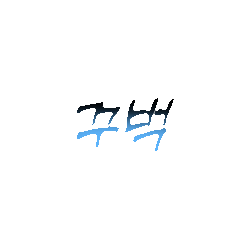

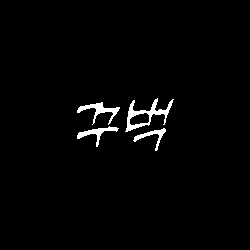

(250, 250, 4)


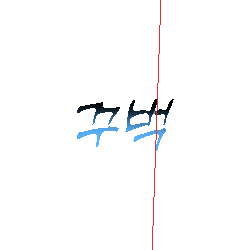

검사된 픽셀 값: [array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([ 66,  47,  24, 255], dtype=uint8), array([ 56,  40,  20, 255], dtype=uint8), array([ 47,  35,  18, 255], dtype=uint8), array([ 41,  30,  16, 255], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([  4,   3,   1, 255], dtype=uint8), array([  3,   2,   1, 255], dtype=uint8), array([  2,   1,   1, 255], dtype=uint8), array([  1,   1

In [70]:
cv2_imshow(erd_image)

# 이미지의 중심 좌표 설정
center = (erd_image.shape[1] // 1.6, erd_image.shape[0] // 2)   # 소수 가능

# 주어진 각도로 이미지의 픽셀 검사 (예: 45도, 간격 1 픽셀)
angle_deg = int(angle)
step_size = 1

cv2_imshow(a)


inspected_pixels = inspect_pixels_along_angle(erd_image, center, angle_deg, step_size)

# 검사된 픽셀 값 출력
print("검사된 픽셀 값:", inspected_pixels)

farthest_pixels = find_farthest_pixels(inspected_pixels)
print("가장 먼 두 개의 픽셀 값:", farthest_pixels)

### 아래는 재현하는 과정. 아래코드는 안씀

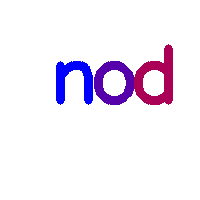

In [83]:
import cv2
import numpy as np

# 글씨를 생성할 이미지 크기 설정
width = 200
height = 200

# 빈 캔버스 생성 (흰 배경)
canvas = np.ones((height, width, 3), dtype=np.uint8) * 255

# 글씨 내용과 위치 설정
text = "nod"
org = (50, 100)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2.5
thickness = 8
color_start = (255, 0, 0)  # 시작 색상 (파란색)
color_end = (0, 0, 255)    # 종료 색상 (빨간색)

# 그라데이션 효과 적용
for i, char in enumerate(text):
    # 현재 글자 위치 계산
    char_org = (org[0] + i * 40, org[1])

    # 현재 글자의 그라데이션 색상 계산
    ratio = i / len(text)
    color = [int(c_start * (1 - ratio) + c_end * ratio) for c_start, c_end in zip(color_start, color_end)]

    # 현재 글자 그리기
    cv2.putText(canvas, char, char_org, font, font_scale, color, thickness)

# 결과 이미지 출력
cv2_imshow(canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()
